Imprting necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Loading and data understanding

In [2]:
df = pd.read_csv('/content/online_course_engagement_data.csv')

In [3]:
df.head(10)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
5,8650,Health,79.466129,12,7,70.233329,76.484023,0,1
6,4321,Health,78.908724,10,2,86.836533,22.588896,1,0
7,4589,Business,12.068237,16,3,61.553646,27.410991,1,0
8,4215,Business,81.935709,8,4,90.264564,33.308437,0,1
9,8089,Programming,83.394026,15,10,63.956353,33.261300,1,0


In [4]:
df.drop('UserID',axis=1,inplace=True)

In [5]:
df.shape

(9000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CourseCategory         9000 non-null   object 
 1   TimeSpentOnCourse      9000 non-null   float64
 2   NumberOfVideosWatched  9000 non-null   int64  
 3   NumberOfQuizzesTaken   9000 non-null   int64  
 4   QuizScores             9000 non-null   float64
 5   CompletionRate         9000 non-null   float64
 6   DeviceType             9000 non-null   int64  
 7   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 562.6+ KB


Null value and duplicate value handling

In [7]:
df.isnull().sum()

CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [8]:
df.duplicated().sum()

877

Target Understanding

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['CourseCompletion'].value_counts()

CourseCompletion
0    4555
1    3568
Name: count, dtype: int64

Data Preprocessing

Converting object type into integer type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8123 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CourseCategory         8123 non-null   object 
 1   TimeSpentOnCourse      8123 non-null   float64
 2   NumberOfVideosWatched  8123 non-null   int64  
 3   NumberOfQuizzesTaken   8123 non-null   int64  
 4   QuizScores             8123 non-null   float64
 5   CompletionRate         8123 non-null   float64
 6   DeviceType             8123 non-null   int64  
 7   CourseCompletion       8123 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 571.1+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CourseCategory'] = le.fit_transform(df['CourseCategory'])

EDA - Data Visualizations <br />

This gives you an insight about the dataset and analytical factor among feature

Heatmap - gives you correlation

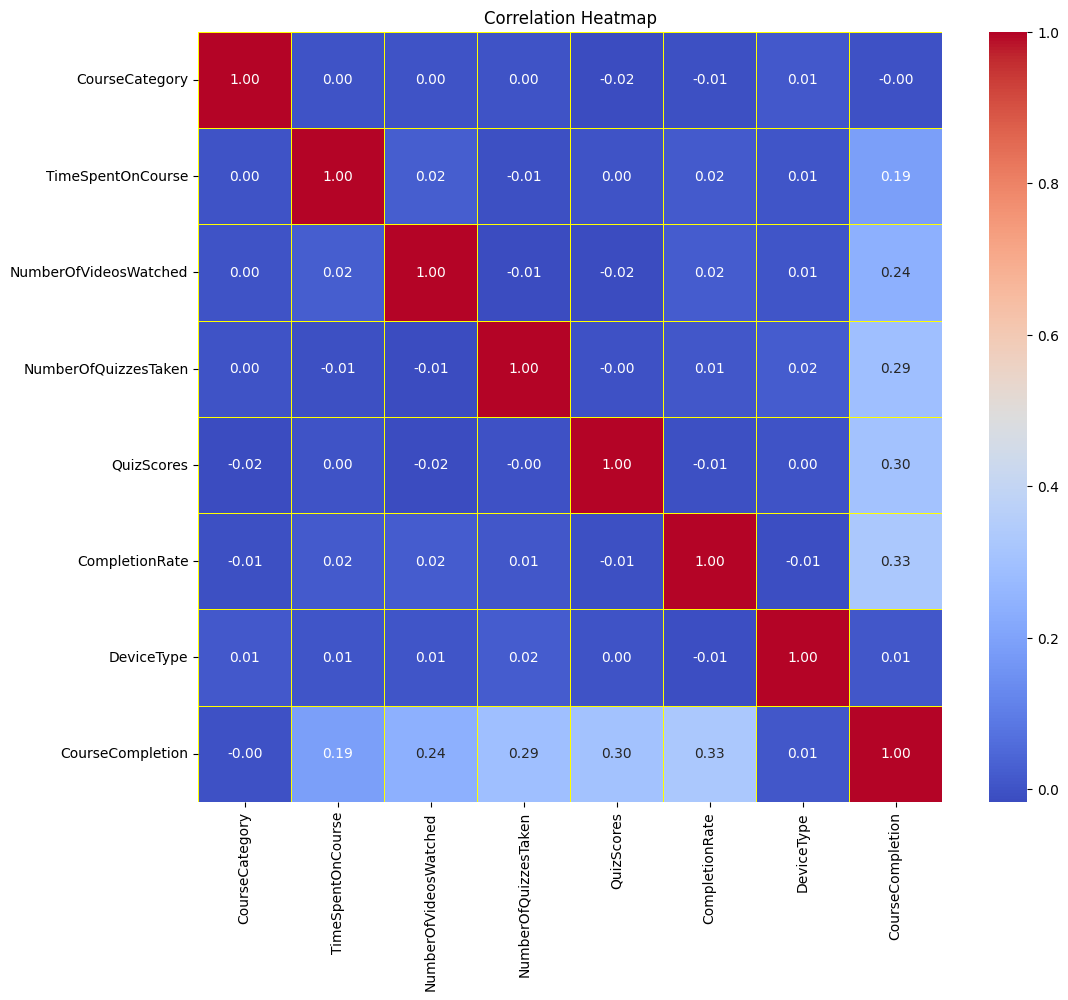

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor= 'yellow')
plt.title('Correlation Heatmap')
plt.show()

Boxplot - gives you an idea about the outliers

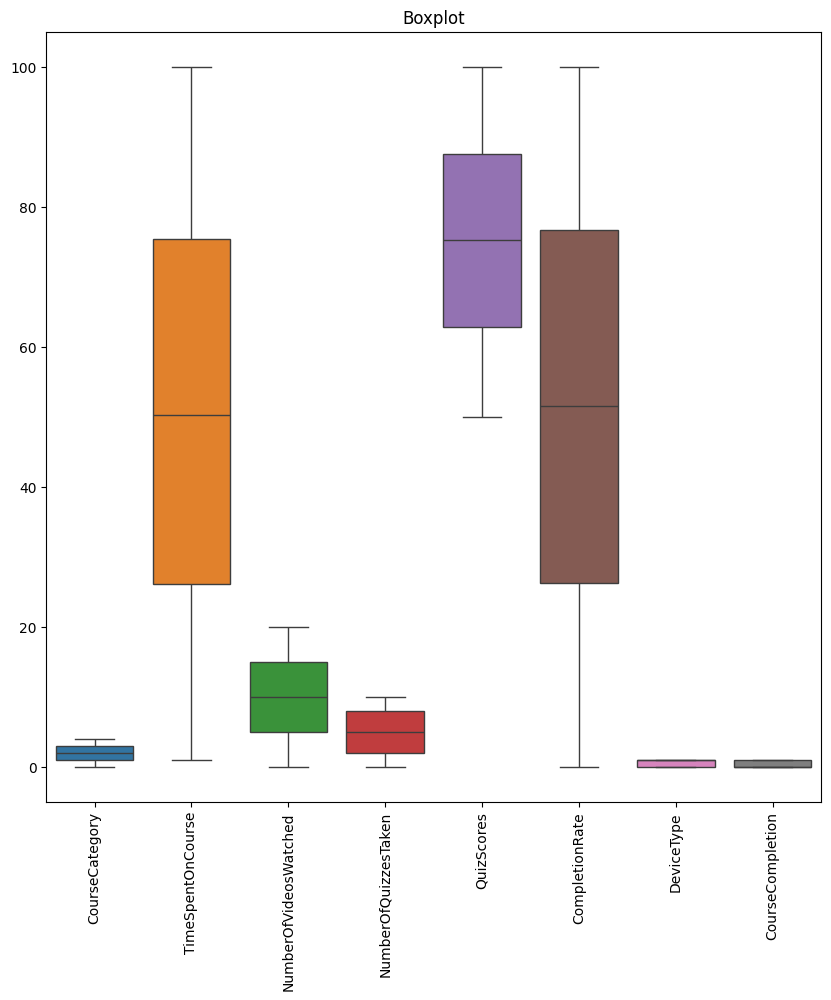

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.title('Boxplot')
plt.xticks(rotation=90)
plt.show()

Pie-Chart of course category

Pro-tip : always have a head function and coulmns (df.columns) to correctly analyse without error or forgetting columns

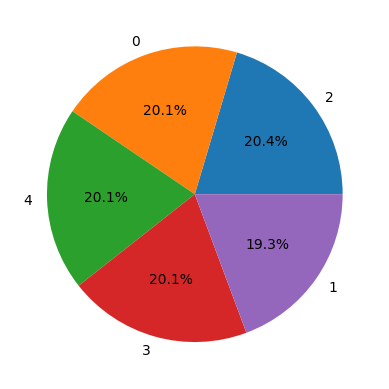

In [18]:
plt.pie(df['CourseCategory'].value_counts(), labels=df['CourseCategory'].unique(), autopct='%1.1f%%')
plt.show()

Bar-Plot : it gives you distribution of categorical vs numerical

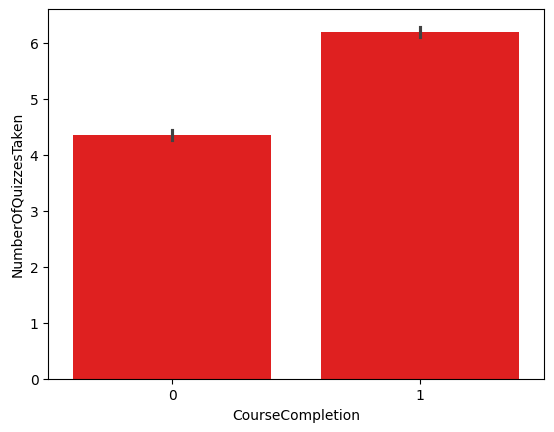

In [40]:
sns.barplot(x='CourseCompletion',y='NumberOfQuizzesTaken',data=df, color='red')
plt.show()

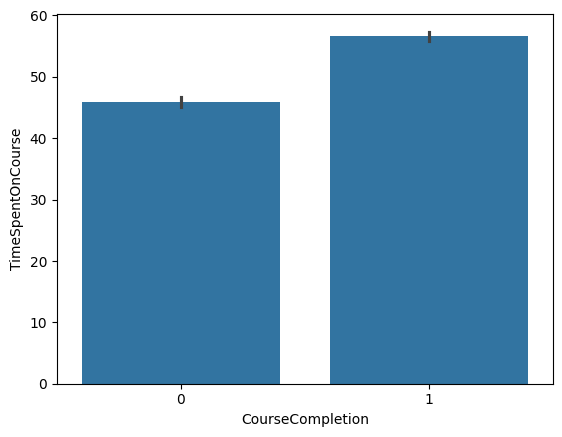

In [20]:
sns.barplot(x='CourseCompletion',y='TimeSpentOnCourse',data=df)
plt.show()

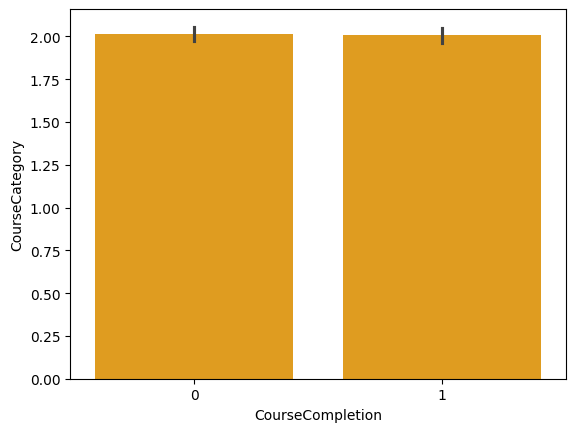

In [41]:
sns.barplot(x='CourseCompletion',y='CourseCategory',data=df, color='orange')
plt.show()

Scatterplot: it is used for analysing 2 numerical columns

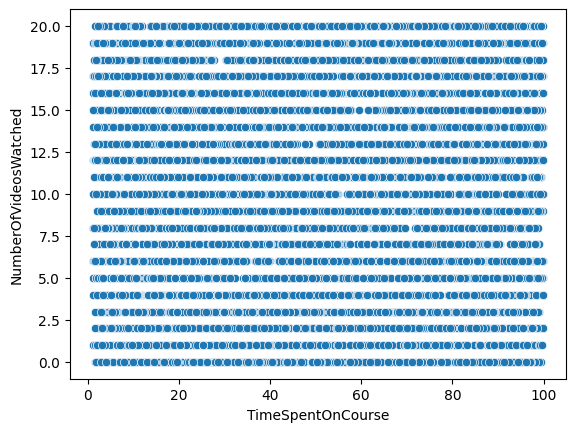

In [23]:
sns.scatterplot(y='NumberOfVideosWatched',x='TimeSpentOnCourse',data=df)
plt.show()

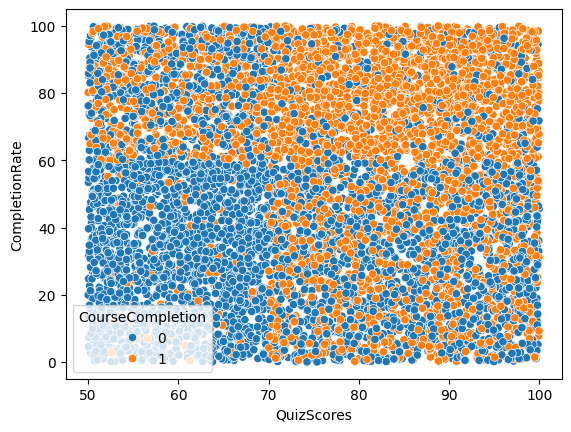

In [25]:
sns.scatterplot(x='QuizScores',y='CompletionRate',data=df,hue ='CourseCompletion')
plt.show()

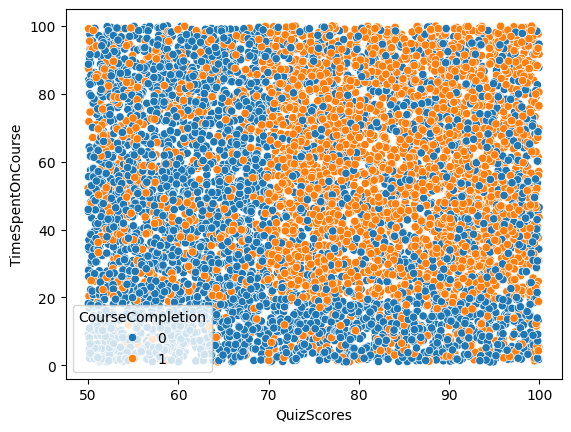

In [27]:
sns.scatterplot(x='QuizScores',y='TimeSpentOnCourse',data=df,hue ='CourseCompletion')
plt.show()

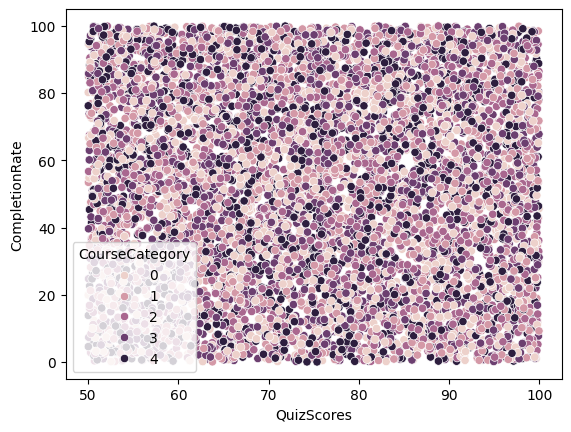

In [28]:
sns.scatterplot(x='QuizScores',y='CompletionRate',data=df,hue ='CourseCategory')
plt.show()

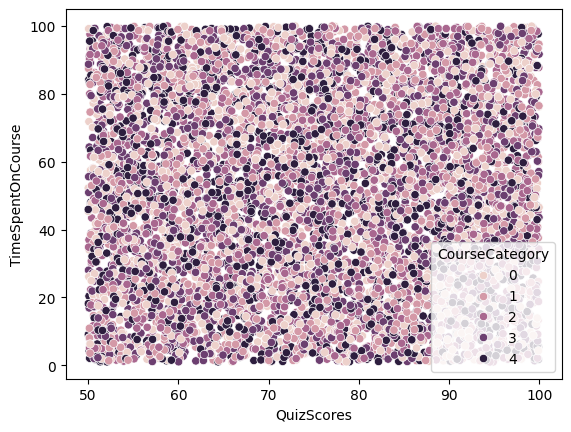

In [29]:
sns.scatterplot(x='QuizScores',y='TimeSpentOnCourse',data=df,hue ='CourseCategory')
plt.show()

Histplot - gives a single variable distribution

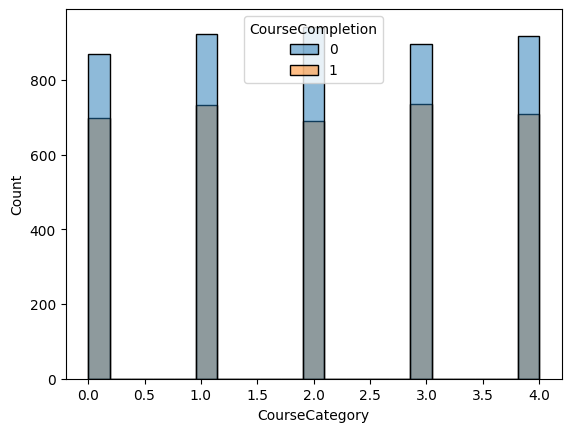

In [30]:
sns.histplot(x='CourseCategory',data=df,hue='CourseCompletion')
plt.show()

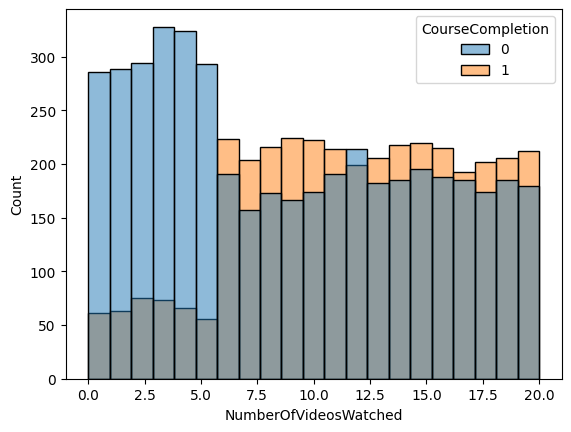

In [31]:
sns.histplot(x='NumberOfVideosWatched',data=df,hue='CourseCompletion')
plt.show()

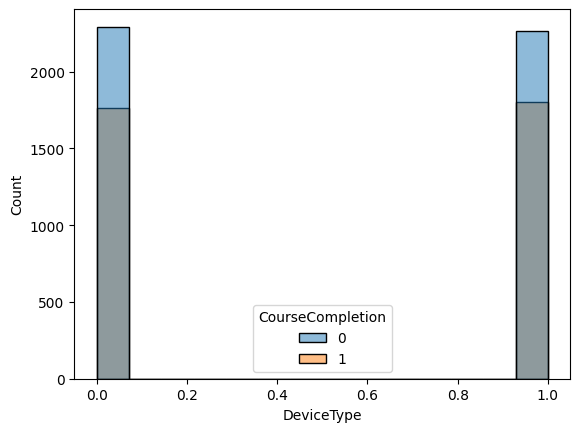

In [36]:
sns.histplot(x='DeviceType',data=df,hue='CourseCompletion')
plt.show()

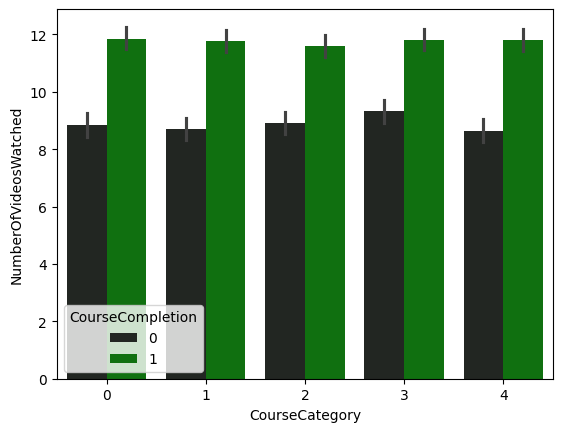

In [39]:
sns.barplot(y='NumberOfVideosWatched',data=df,hue='CourseCompletion',x='CourseCategory', color='green')
plt.show()

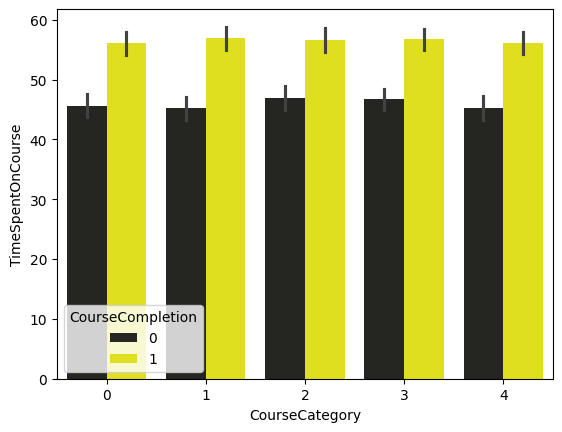

In [38]:
sns.barplot(x='CourseCategory',y='TimeSpentOnCourse',data=df,hue='CourseCompletion', color= 'yellow')
plt.show()

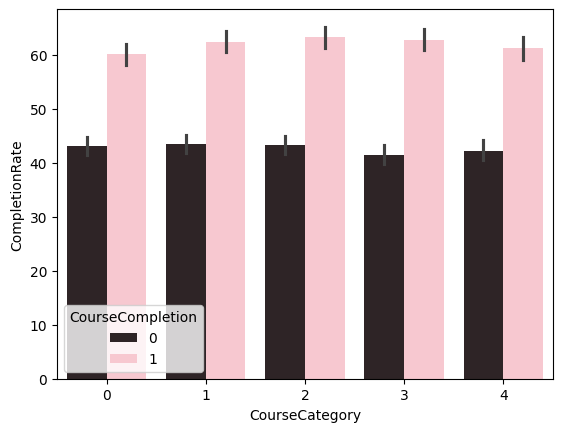

In [43]:
sns.barplot(x='CourseCategory',y='CompletionRate',data=df,hue='CourseCompletion', color= 'pink')
plt.show()

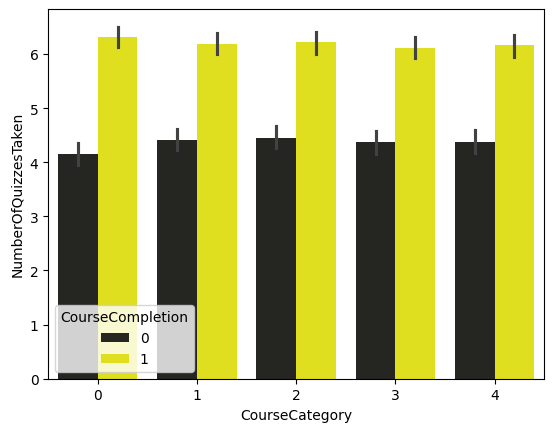

In [44]:
sns.barplot(x='CourseCategory',y='NumberOfQuizzesTaken',data=df,hue='CourseCompletion', color= 'yellow')
plt.show()

In [17]:
df.head(10)

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,2,29.979719,17,3,50.365656,20.860773,1,0
1,0,27.802640,1,5,62.615970,65.632415,1,0
2,0,86.820485,14,2,78.458962,63.812007,1,1
3,4,35.038427,17,10,59.198853,95.433162,0,1
4,3,92.490647,16,0,98.428285,18.102478,0,0
5,2,79.466129,12,7,70.233329,76.484023,0,1
6,2,78.908724,10,2,86.836533,22.588896,1,0
7,1,12.068237,16,3,61.553646,27.410991,1,0
8,1,81.935709,8,4,90.264564,33.308437,0,1
9,3,83.394026,15,10,63.956353,33.261300,1,0


Feature Split

In [45]:
X = df.drop('CourseCompletion',axis=1)
y = df['CourseCompletion']

Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Standard Scaler

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Model Building

In [49]:
from sklearn.linear_model import RidgeClassifier
rd = RidgeClassifier()
rd.fit(X_train,y_train)

RidgeClassifier()

Model Training Prediction

In [50]:
y_pred = rd.predict(X_test)

Accuracy, Confusion Matrix and Classification Report

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7912358444116199
[[931 197]
 [227 676]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1128
           1       0.77      0.75      0.76       903

    accuracy                           0.79      2031
   macro avg       0.79      0.79      0.79      2031
weighted avg       0.79      0.79      0.79      2031



Hyper Parameter Tuning

In [ ]:
# prompt: hyper parameter tuning grid search for ridge classifier

from sklearn.model_selection import GridSearchCV
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
rd_regressor = RidgeClassifier()
grid = GridSearchCV(rd_regressor, parameters, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
# Print the best parameters
print(grid.best_params_)
# Use the best parameters to fit a new model
rd_best = RidgeClassifier(alpha=grid.best_params_['alpha'])
rd_best.fit(X_train, y_train)
# Evaluate the new model
y_pred_best = rd_best.predict(X_test)
print(accuracy_score(y_test, y_pred_best))


HyperParameter Tuning Results

In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
grid = GridSearchCV(rd, parameters, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='accuracy')

Best params

In [53]:
print(grid.best_params_)

{'alpha': 20}


In [54]:
print(grid.best_score_)

0.7910375001178656


Pickling the model for future use

In [55]:
import pickle

In [56]:
pickle.dump(rd,open('model.pkl','wb'))

Model 2 - Bagging classifier

In [58]:
# prompt: Bagging classifier code

from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()
bg.fit(X_train,y_train)
y_pred_bg = bg.predict(X_test)
print(accuracy_score(y_test,y_pred_bg))
print(confusion_matrix(y_test,y_pred_bg))
print(classification_report(y_test,y_pred_bg))

# HyperParameter Tuning

parameters = {'n_estimators': [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]}
grid = GridSearchCV(bg, parameters, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

# Best Parameters

print(grid.best_params_)
print(grid.best_score_)

# Best Model

bg_best = BaggingClassifier(n_estimators=grid.best_params_['n_estimators'])
bg_best.fit(X_train, y_train)
y_pred_bg_best = bg_best.predict(X_test)

print(accuracy_score(y_test, y_pred_bg_best))


# Pickling the Model
pickle.dump(bg_best,open('model_bg.pkl','wb'))


0.9522402757262433
[[1097   31]
 [  66  837]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1128
           1       0.96      0.93      0.95       903

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

{'n_estimators': 90}
0.9545312249535609
0.9547021171836534
